# Download Images of a Camera and Create a Movie

Use this script to download images and create a movie of a camera during a day.

In [1]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (8.0, 8.0)
import CameraNetwork
import CameraNetwork.global_settings as gs
import cv2
import Image
import ImageDraw
import time
from tqdm import tqdm_notebook
import traceback

c:\users\user\documents\code\cameranetwork_git\CameraNetwork\transformation_matrices.py:1934: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


## Connect to Network

In [2]:
c = CameraNetwork.CLIclient()
proxy_params = CameraNetwork.retrieve_proxy_parameters()
c.start(proxy_params)
time.sleep(3)
SERVERS = c.client_instance.servers
print SERVERS

['109L', '110', '111', '111L', '114L', '115', '116', '117', '118', '119', '122', '123', '219']


## Settings

In [3]:
CAM = 219
DAY = 13
MONTH = 8
HDR = '2'
JPEG_QUALITY = 100

#
# For network camera
#
#RESOLUTION = 301
#VIDEO_RESOLUTION = (301, 301)

#
# For solar camera
#
RESOLUTION = 300
VIDEO_RESOLUTION = (400, 300)

ADD_TIMER_OVERLAY = True

In [4]:
df = c.query('{}'.format(CAM), '{:02}/{}/2017'.format(MONTH, DAY))[0]
print("Camera {} captured {} images on this day.".format(CAM, df.shape[0]))

Camera 219 captured 2652 images on this day.


### Download Test Image

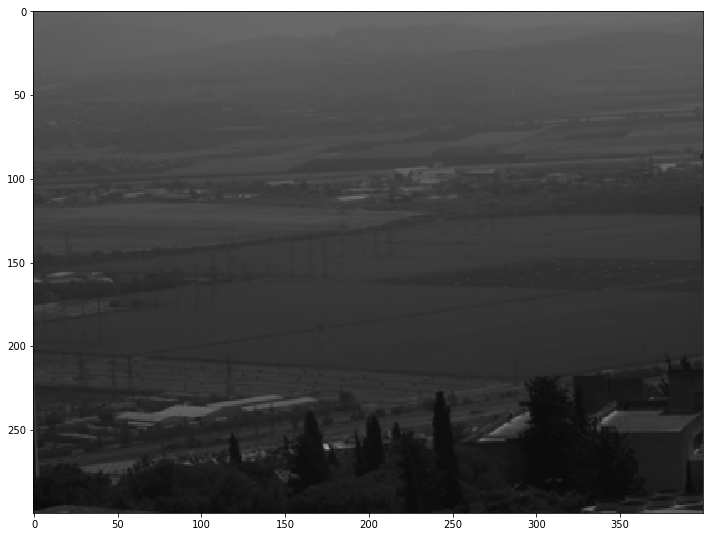

In [9]:
ind = df.loc[(slice(None), HDR), :].index[100]
img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]
plt.figure(figsize=(12, 12))
plt.imshow(img)

In [10]:
import scipy.misc
scipy.misc.imsave('example.jpg', img)


### Download Movie

In [6]:
video = cv2.VideoWriter(
    'video_{}_2017_{:02}_{:02}_{}.avi'.format(CAM, MONTH, DAY, HDR),
    -1, 6, VIDEO_RESOLUTION
)

for ind in tqdm_notebook(df.loc[(slice(None), HDR), :].index):
    try:
        img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]

        if ADD_TIMER_OVERLAY:
            img = Image.fromarray(img)
            draw = ImageDraw.Draw(img)
            draw.text(
                (0, 0),
                ind[0].time().strftime("%H:%M:%S"),
                (255, 255, 255)
            )

        video.write(cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR))

    except Exception, e:
        traceback.print_exc()
        
video.release()

Traceback (most recent call last):
  File "<ipython-input-6-e925991c272f>", line 8, in <module>
    img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]
  File "c:\users\user\documents\code\cameranetwork_git\CameraNetwork\client.py", line 516, in seek
    resolution=resolution
  File "c:\users\user\documents\code\cameranetwork_git\CameraNetwork\client.py", line 377, in send_message
    results.append(future.result(timeout=self.timeout))
  File "C:\Users\User\Anaconda2\lib\site-packages\concurrent\futures\_base.py", line 405, in result
    raise TimeoutError()
TimeoutError
Traceback (most recent call last):
  File "<ipython-input-6-e925991c272f>", line 8, in <module>
    img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]
  File "c:\users\user\documents\code\cameranetwork_git\CameraNetwork\client.py", line 516, in seek
    resolution=resolution
  File "c:\users\user\documents\code\cameranetwork_git\CameraNetwork\client.py", line 377, 